In [ ]:
# Gpt models are fantastic at generating text in response to a prompt.
# Bert Bidirectional Encoder Representations Transformers
# Bert is a pretrained model that uses the transformer architecture to process and understand natural language
# Develped by Google in 2018, go to model for devs in nlp. Bert was trained on massive amount of dataset including the books corpus dataset 
# which has 11000 books and wikipedia. Two models. 1- Bert Base have 110 million parameters and Bert large with 340 million parameters
# GPT models are auto regressive meaning they predict the next word in the sentence baed on the preceding words
# Bert unique for bidrectional context understanding. it predicts missing word in sentence by considering the entire context both the left context
# and the right context in a pretraining process. helps to understand context and meaning better
# GPT and Bert excel at different things. GPT models do exceptionally well at conversations and chatbots.
# Bert is great at sentiment analysis, question answering and named entity recognition


# BERT Architecture

In [ ]:
# Only employs the encoder block unlike chat gpt. Because it uses  pretraining of the large corpus of text instead of sequence to sequence tasks

In [ ]:
# Consists of stack of identical encoder layers. Bert Base has 12 encoderlayers and large has 24layers ( more complex relationships in context)

In [ ]:
# input is tokenized text and each token is represented as an embedding vector. Each token is converted into three types of embeddings 

In [ ]:
# Token embeddings - Numerical representations of the token, specials tokens CLS and SEP are added to beginning and end of sequence

In [ ]:
# Segment embedding - Can accept pairs of inputs and sequences and this can be distinguished here

In [ ]:
# Tranformer positional embeddings - encode the position of each token in the input sequence

In [ ]:
# The objective of this architecture is to understand and represent this text bidirectionally

In [ ]:
# Model pre-training  -  Mask Language Modelling - A fraction of token in each input sequence is randomly masked (15%) and model is trained
# to predict the masked word based on the context provided by surrounded tokens. Forces model to learn bidirectional context on either side.

In [ ]:
# Second training - next sentence prediction - predict whether twoo sentences in a pair are consecutive in the original text or not.
# During this trianing 50% of the sentences are trained with the next sentence and the other 50% is trained with a random sentence. 
# This helps model understand relationships between sentences. This training does not require generating text, hence decoder is unnecessary

In [ ]:
# Bert can fine tuned for a specific task by adding a task specific layer on top of the pre trained encoder layers. For example if we want
# to sentiment analysis,  the final output layer would tranform output into a sentiment label - flexible and adaptable model

In [20]:
from transformers import BertForQuestionAnswering
from transformers import BertTokenizer

In [22]:
import torch

In [28]:
#model_name = "distilbert-base-uncased-distilled-squad"
model_name = "bert-large-uncased-whole-word-masking-finetuned-squad"

In [30]:
model = BertForQuestionAnswering.from_pretrained(model_name)

config.json:   0%|          | 0.00/443 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.34G [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-large-uncased-whole-word-masking-finetuned-squad were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [32]:
tokenizer = BertTokenizer.from_pretrained(model_name)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [34]:
# example question and text containing the answer
question = "When was the first dvd released?"
answer_document = "The first DVD (Digital Versatile Disc) was released on March 24, 1997. It was a movie titled 'Twister' and was released in Japan. DVDs quickly gained popularity as a replacement for VHS tapes and became a common format for storing and distributing digital video and data."

In [ ]:
# Create embeddings for our question and answer

In [36]:
encoding = tokenizer.encode_plus( text = question, text_pair=answer_document)

In [38]:
print(encoding)

{'input_ids': [101, 2043, 2001, 1996, 2034, 4966, 2207, 1029, 102, 1996, 2034, 4966, 1006, 3617, 22979, 5860, 1007, 2001, 2207, 2006, 2233, 2484, 1010, 2722, 1012, 2009, 2001, 1037, 3185, 4159, 1005, 9792, 2121, 1005, 1998, 2001, 2207, 1999, 2900, 1012, 22477, 2855, 4227, 6217, 2004, 1037, 6110, 2005, 17550, 13324, 1998, 2150, 1037, 2691, 4289, 2005, 23977, 1998, 20083, 3617, 2678, 1998, 2951, 1012, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [ ]:
# embeddings along with the special tokens added to it are in the input_ids. token_type id are used to distinguish tokens related to question

In [42]:
inputs = encoding['input_ids']
sentence_embeddings = encoding['token_type_ids']

In [46]:
tokens = tokenizer.convert_ids_to_tokens(inputs)

In [48]:
print(tokens)

['[CLS]', 'when', 'was', 'the', 'first', 'dvd', 'released', '?', '[SEP]', 'the', 'first', 'dvd', '(', 'digital', 'versatile', 'disc', ')', 'was', 'released', 'on', 'march', '24', ',', '1997', '.', 'it', 'was', 'a', 'movie', 'titled', "'", 'twist', '##er', "'", 'and', 'was', 'released', 'in', 'japan', '.', 'dvds', 'quickly', 'gained', 'popularity', 'as', 'a', 'replacement', 'for', 'vhs', 'tapes', 'and', 'became', 'a', 'common', 'format', 'for', 'storing', 'and', 'distributing', 'digital', 'video', 'and', 'data', '.', '[SEP]']


In [ ]:
# special tokens have been added

In [52]:
output = model(input_ids=torch.tensor([inputs]), token_type_ids = torch.tensor([sentence_embeddings]))

In [ ]:
# Bert calculates where the answer is in our text by creating start vectors and end vectors and taking the dot product of these and the final
#embedding of each token. This output then runs through a softmax function to give a probability score. The word with the highest probability
# is considered the correct start or end token respectively, so we want to get the star and end decisions from our output

In [54]:
start_index = torch.argmax(output.start_logits)
end_index = torch.argmax(output.end_logits)

In [56]:
print( start_index, end_index)

tensor(20) tensor(23)


In [62]:
answer = ' '.join(tokens[start_index:end_index+1])
print(answer)

march 24 , 1997


In [74]:
import matplotlib as plt
import seaborn as sns

In [ ]:
# find the scores for each token,pytorch tensors and convert them to numpy array

In [76]:
s_scores = output.start_logits.detach().numpy().flatten()
e_scores = output.end_logits.detach().numpy().flatten()

In [ ]:
# use the tokens as x axis label. They all need to be unique

In [78]:
token_labels =[]
for ( i, token ) in enumerate(tokens):
    token_labels.append('{:}-{:>2}'.format(token,i)) # creating a string where token is left aligned,index is right aligned with 2char widefield

/var/folders/55/z4lt05n13lggvkf4cntq7dc40000gr/T/ipykernel_90864/3826009763.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotations=90, ha="center")


AttributeError: Text.set() got an unexpected keyword argument 'rotations'

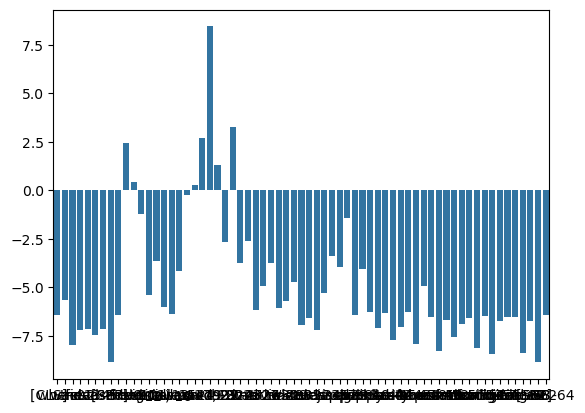

In [82]:
ax = sns.barplot(x=token_labels, y=s_scores) # bar plot for start scores
ax.set_xticklabels(ax.get_xticklabels(), rotations=90, ha="center")
ax.grid(True) # vertical grid to align the word to the scores

/var/folders/55/z4lt05n13lggvkf4cntq7dc40000gr/T/ipykernel_90864/1129150506.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotations=90, ha="center")


AttributeError: Text.set() got an unexpected keyword argument 'rotations'

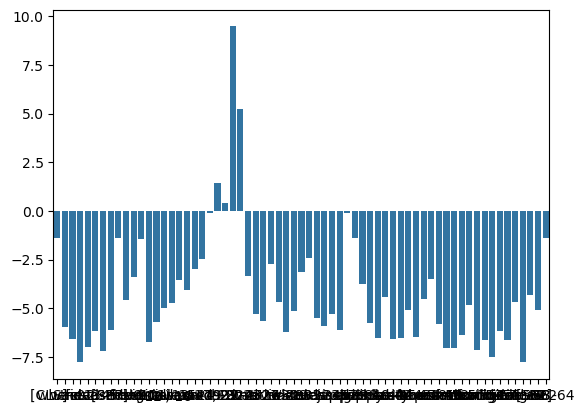

In [84]:
ax = sns.barplot(x=token_labels, y=e_scores) # bar plot for start scores
ax.set_xticklabels(ax.get_xticklabels(), rotations=90, ha="center")
ax.grid(True) # vertical grid to align the word to the scores